In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

"savefig(fname, dpi=None, facecolor='w', edgecolor='w',\n        orientation='portrait', papertype=None, format=None,\n        transparent=False, bbox_inches=None, pad_inches=0.1,\n        frameon=None, metadata=None)"

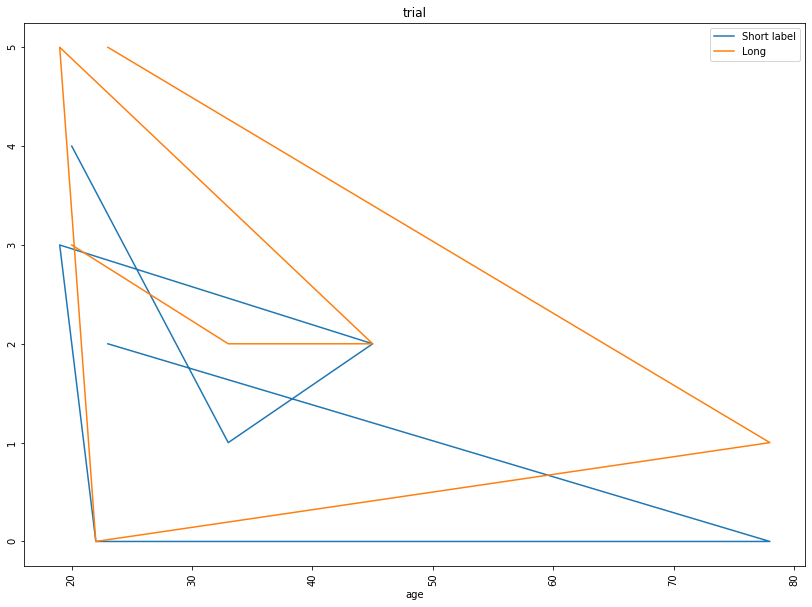

In [45]:
def cm_to_inch(value):
    return value/2.54
    #mask = mobility_df["region_code"] == i
    #df = mobility_df[mask]
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
df.plot(y=["num_children","num_pets"],
        x="age",title="trial",
       figsize=(14, 10),
        label=['Short label','Long'],
       )

plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.savefig('../data/trial.png',
           transparent=True)
#df.figure(figsize=(1, 1))
#df.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))
    #plt.savefig('../data/figures/mobility/raw/plot'+i+'.png')
    
#df.show()

'''savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)'''

In [3]:
pm10 = pd.read_csv("../data/processed/airquality/discomap/PM10/pm10_df_clear.csv", sep = ",")
pm10["DatetimeBegin"] = pd.to_datetime(pm10["DatetimeBegin"])
pm10_mean = pd.DataFrame()

#print(pm10.groupby([pd.Grouper(key="DatetimeBegin", freq='1D')]).mean())

for i in set(pm10["AirQualityStationEoICode"]):
    #print(i)
    mask = pm10["AirQualityStationEoICode"] == i
    pm10_r = pm10[mask]
    pm10_r = pm10_r.groupby([pd.Grouper(key="DatetimeBegin", freq='1D')]).mean()
    pm10_r["AirQualityStationEoICode"] = i
    pm10_mean = pm10_mean.append(pm10_r)
    pm10_mean.to_csv('../data/processed/airquality/discomap/PM10/pm10_df_daily_mean.csv', index=False, mode = "w")

,DatetimeBegin,Concentration,Validity,Verification,AirQualityStationEoICode,region_iso
0,2020-01-01 00:00:00+01:00,24.100861,1.0,3.0,HU0022A,HU-BU
1,2020-01-02 00:00:00+01:00,12.405561,1.0,3.0,HU0022A,HU-BU
2,2020-01-03 00:00:00+01:00,22.336883,1.0,3.0,HU0022A,HU-BU
3,2020-01-04 00:00:00+01:00,20.124021,1.0,3.0,HU0022A,HU-BU
4,2020-01-05 00:00:00+01:00,46.485165,1.0,3.0,HU0022A,HU-BU
...,...,...,...,...,...,...
7584,2021-03-28 00:00:00+01:00,76.480747,1.0,3.0,HU0032A,HU-PE
7585,2021-03-29 00:00:00+01:00,52.672975,1.0,3.0,HU0032A,HU-PE
7586,2021-03-30 00:00:00+01:00,50.144586,1.0,3.0,HU0032A,HU-PE
7587,2021-03-31 00:00:00+01:00,52.430541,1.0,3.0,HU0032A,HU-PE


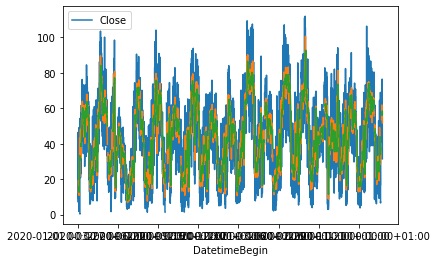

In [14]:
o3 = pd.read_csv("../data/processed/airquality/discomap/O3/o3_df_daily_mean.csv", sep = ",")
display(o3)
o3.plot(x="DatetimeBegin", y='Concentration',label= 'Close')
plt.plot(o3['Concentration'].rolling(9).mean(),label= 'MA 9 days')
plt.plot(o3['Concentration'].rolling(21).mean(),label= 'MA 9 days')
#plt.plot(df['WFC'].rolling(21).mean(),label= 'MA 21 days')

In [4]:
display(pm10)

,AirQualityStationEoICode,Concentration,UnitOfMeasurement,DatetimeBegin,Validity,Verification,region_iso
0,HU0030A,21.379310,µg/m3,2020-01-01 00:00:00+01:00,1,3,HU-BA
1,HU0030A,24.311765,µg/m3,2020-01-01 01:00:00+01:00,1,3,HU-BA
2,HU0030A,19.625522,µg/m3,2020-01-01 02:00:00+01:00,1,3,HU-BA
3,HU0030A,12.834167,µg/m3,2020-01-01 03:00:00+01:00,1,3,HU-BA
4,HU0030A,13.405475,µg/m3,2020-01-01 04:00:00+01:00,1,3,HU-BA
...,...,...,...,...,...,...,...
250020,HU0037A,16.809197,µg/m3,2021-04-01 00:00:00+01:00,1,3,HU-VE
250021,HU0034A,28.397310,µg/m3,2021-04-01 01:00:00+01:00,1,3,HU-VE
250022,HU0037A,16.396137,µg/m3,2021-04-01 01:00:00+01:00,1,3,HU-VE
250023,HU0034A,28.206890,µg/m3,2021-04-01 02:00:00+01:00,1,3,HU-VE
